In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
df=pd.read_csv('/content/breast cancer classification dataset.csv')

In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,NaN,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  9
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      8
Unnamed:

In [ ]:
df.drop("Unnamed: 32",axis=1,inplace=True)

# New Section

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df[['radius_mean']])
df['radius_mean']=imp_mean.transform(df[['radius_mean']])

In [ ]:
imp_mean.fit(df[['fractal_dimension_worst']])
df['fractal_dimension_worst']=imp_mean.transform(df[['fractal_dimension_worst']])

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis_Encoded'] = df['diagnosis'].map( {'B':1, 'M':0}) #B=1 and M=0

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:77: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  df[b][common], df[a][common], marker=marker, alpha=alpha, **kwds


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34d8fb77f0>,
      dtype=object)

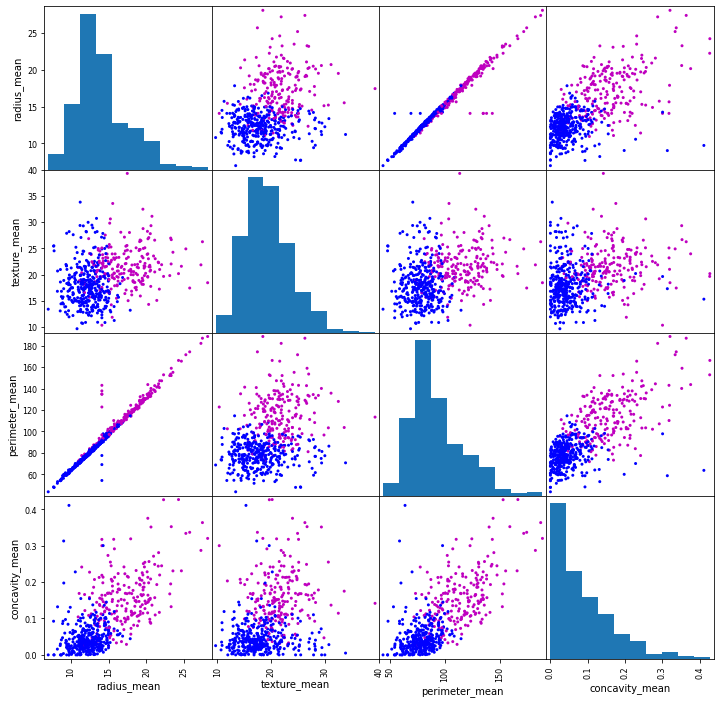

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['radius_mean','texture_mean','perimeter_mean','concavity_mean']],c=df['diagnosis'],figsize=(12,12),alpha=1)

In [ ]:
df.drop('diagnosis',axis=1,inplace=True)

In [ ]:
df_columns=list(df.columns.values)

In [ ]:
from sklearn import preprocessing

x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [ ]:
df.columns=df_columns

In [ ]:
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_Encoded
0,0.000915,0.336528,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.190078,0.0
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.001007,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,0.385479,0.197976,0.325873,0.283710,0.291906,0.200213,0.131263,0.464861,0.045843,0.115536,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,0.0
565,0.001007,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,0.236828,0.464728,0.209490,0.172279,0.137879,0.165064,0.099747,0.317863,0.156160,0.055387,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.190078,0.0
566,0.001008,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,0.124896,0.157974,0.125713,0.077976,0.142435,0.263301,0.119444,0.294942,0.074548,0.103547,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,0.0
567,0.001008,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,0.222524,0.272896,0.236300,0.148335,0.163477,0.445579,0.179722,0.315211,0.216103,0.182766,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,0.0


In [ ]:
df_target=df['diagnosis_Encoded']
df_target=df_target.to_numpy().astype('int')

In [ ]:
df.drop('diagnosis_Encoded',axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df, df_target,test_size=.2,random_state=1)
print(X_train.shape)
print(X_test.shape)

(455, 31)
(114, 31)


In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
v0=svc.score(X_test,y_test)

In [ ]:
print("Test accuracy SVC {:.2f}".format(svc.score(X_train,y_train)))
print("Test accuracy SVC {:.2f}".format(svc.score(X_test,y_test)))

Test accuracy SVC 0.98
Test accuracy SVC 0.97


In [ ]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(svc.predict(X_test),y_test)
print(matrix)

[[39  0]
 [ 3 72]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=30)
forest.fit(X_train,y_train)
v2=forest.score(X_test,y_test)
print("Test accuracy RandomForest {:.2f}".format(forest.score(X_train,y_train)))
print("Test accuracy RandomForest {:.2f}".format(forest.score(X_test,y_test)))

Test accuracy RandomForest 1.00
Test accuracy RandomForest 0.95


In [ ]:
matrix2=confusion_matrix(forest.predict(X_test),y_test)
print(matrix2)

[[39  1]
 [ 3 71]]


In [ ]:
from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(hidden_layer_sizes=(32,64,32),activation='relu',max_iter=1000)
neural.fit(X_train,y_train)
v5=forest.score(X_test,y_test)
print("Train accuracy Neural {:.2f}".format(forest.score(X_train,y_train)))
print("Test accuracy Neural {:.2f}".format(forest.score(X_test,y_test)))

Train accuracy Neural 1.00
Test accuracy Neural 0.95


In [ ]:
matrix3=confusion_matrix(neural.predict(X_test),y_test)
print(matrix3)

[[37  0]
 [ 5 72]]


In [ ]:

from sklearn.decomposition import PCA
pca=PCA(n_components=15)

In [ ]:
Principal_Comp=pca.fit_transform(df)

In [ ]:
print(Principal_Comp)

[[ 1.34520919  0.47120729 -0.53192327 ...  0.05354764 -0.05203896
  -0.15271241]
 [ 0.45640274 -0.56560161 -0.21154515 ... -0.13009122  0.15578679
  -0.05239219]
 [ 0.95528859 -0.11488571 -0.14627274 ...  0.05966107  0.01389699
  -0.02059285]
 ...
 [ 0.22525107 -0.28851113  0.31079163 ...  0.06058509 -0.04176057
   0.02945588]
 [ 1.67882332  0.33063238  0.28594781 ... -0.01096112 -0.1521768
  -0.01533436]
 [-0.90442204 -0.10160918  0.38258528 ...  0.13162144  0.01025607
  -0.21210931]]


In [ ]:
pca.explained_variance_ratio_

array([0.51412981, 0.16769135, 0.06930458, 0.06253899, 0.03973574,
       0.03165378, 0.02757146, 0.01529431, 0.01123693, 0.00935979,
       0.00922153, 0.00826681, 0.00740886, 0.00639625, 0.00467007])

In [ ]:
pdf=pd.DataFrame(data=Principal_Comp)
pdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.345209,0.471207,-0.531923,0.057615,-0.069531,-0.142086,0.122031,0.232961,-0.026318,0.172927,0.138887,0.104332,0.053548,-0.052039,-0.152712
1,0.456403,-0.565602,-0.211545,-0.034008,0.013714,-0.038101,-0.015980,0.033153,0.021678,-0.121011,-0.009880,0.067272,-0.130091,0.155787,-0.052392
2,0.955289,-0.114886,-0.146273,0.008075,-0.035250,-0.020722,0.080150,-0.111585,-0.009400,-0.087323,-0.027539,0.039995,0.059661,0.013897,-0.020593
3,1.007340,1.518578,-0.052780,-0.198997,-0.221093,-0.219119,0.340496,0.186593,0.166559,0.045686,-0.191073,0.154895,0.204233,0.132906,-0.025812
4,0.626228,-0.305965,-0.398939,0.257737,-0.006205,0.146161,-0.070243,-0.065611,0.038761,0.000284,-0.018884,-0.126632,-0.073148,0.030346,-0.058377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.000873,-0.477055,-0.095964,0.272951,-0.083235,0.179559,-0.257464,-0.127442,-0.010652,-0.036036,0.137815,-0.054613,0.037262,0.035698,-0.035764
565,0.629707,-0.488913,0.401951,0.141561,-0.072751,-0.046389,-0.127052,-0.034460,-0.088877,0.040056,-0.016288,0.059795,-0.048053,0.064083,0.023272
566,0.225251,-0.288511,0.310792,-0.026236,0.220193,0.033312,-0.083418,-0.029881,0.006211,-0.135812,0.010629,-0.021245,0.060585,-0.041761,0.029456
567,1.678823,0.330632,0.285948,-0.171529,0.074334,-0.121053,0.024453,0.074275,-0.072124,0.076737,-0.071088,-0.124179,-0.010961,-0.152177,-0.015334


In [ ]:
s=pd.DataFrame(df_target)
s.drop(labels=0,axis=1)
s

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
main=pd.concat([pdf,s],axis=1)
main

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,0
0,1.345209,0.471207,-0.531923,0.057615,-0.069531,-0.142086,0.122031,0.232961,-0.026318,0.172927,0.138887,0.104332,0.053548,-0.052039,-0.152712,0
1,0.456403,-0.565602,-0.211545,-0.034008,0.013714,-0.038101,-0.015980,0.033153,0.021678,-0.121011,-0.009880,0.067272,-0.130091,0.155787,-0.052392,0
2,0.955289,-0.114886,-0.146273,0.008075,-0.035250,-0.020722,0.080150,-0.111585,-0.009400,-0.087323,-0.027539,0.039995,0.059661,0.013897,-0.020593,0
3,1.007340,1.518578,-0.052780,-0.198997,-0.221093,-0.219119,0.340496,0.186593,0.166559,0.045686,-0.191073,0.154895,0.204233,0.132906,-0.025812,0
4,0.626228,-0.305965,-0.398939,0.257737,-0.006205,0.146161,-0.070243,-0.065611,0.038761,0.000284,-0.018884,-0.126632,-0.073148,0.030346,-0.058377,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.000873,-0.477055,-0.095964,0.272951,-0.083235,0.179559,-0.257464,-0.127442,-0.010652,-0.036036,0.137815,-0.054613,0.037262,0.035698,-0.035764,0
565,0.629707,-0.488913,0.401951,0.141561,-0.072751,-0.046389,-0.127052,-0.034460,-0.088877,0.040056,-0.016288,0.059795,-0.048053,0.064083,0.023272,0
566,0.225251,-0.288511,0.310792,-0.026236,0.220193,0.033312,-0.083418,-0.029881,0.006211,-0.135812,0.010629,-0.021245,0.060585,-0.041761,0.029456,0
567,1.678823,0.330632,0.285948,-0.171529,0.074334,-0.121053,0.024453,0.074275,-0.072124,0.076737,-0.071088,-0.124179,-0.010961,-0.152177,-0.015334,0


In [ ]:
x1_train,x1_test,y1_train,y1_test= train_test_split(pdf,df_target,test_size=0.2, random_state=42)
print(x1_train.shape)
print(x1_test.shape)

(455, 15)
(114, 15)


In [ ]:
svc.fit(x1_train,y1_train)
v1=svc.score(x1_test,y1_test)
print("Test accuracy SVC {:.2f}".format(svc.score(x1_train,y1_train)))
print("Test accuracy SVC {:.2f}".format(svc.score(x1_test,y1_test)))

Test accuracy SVC 0.98
Test accuracy SVC 0.98


In [ ]:
neural.fit(x1_train,y1_train)
v4=neural.score(x1_test,y1_test)
print("Test accuracy neural net {:.2f}".format(neural.score(x1_train,y1_train)))
print("Test accuracy neural net {:.2f}".format(neural.score(x1_test,y1_test)))

Test accuracy neural net 1.00
Test accuracy neural net 0.96


In [ ]:
forest.fit(x1_train,y1_train)
v3=forest.score(x1_test,y1_test)
print("Test accuracy forest {:.2f}".format(forest.score(x1_train,y1_train)))
print("Test accuracy forest {:.2f}".format(forest.score(x1_test,y1_test)))

Test accuracy forest 1.00
Test accuracy forest 0.95


In [ ]:
matrix3=confusion_matrix(neural.predict(x1_test),y1_test)
print("\n Neural Net")
print(matrix3)
matrix3=confusion_matrix(forest.predict(x1_test),y1_test)
print("\n Random Forest")
print(matrix3)
matrix3=confusion_matrix(svc.predict(x1_test),y1_test)
print("\n SVC")
print(matrix3)


 Neural Net
[[41  2]
 [ 2 69]]

 Random Forest
[[41  4]
 [ 2 67]]

 SVC
[[41  0]
 [ 2 71]]


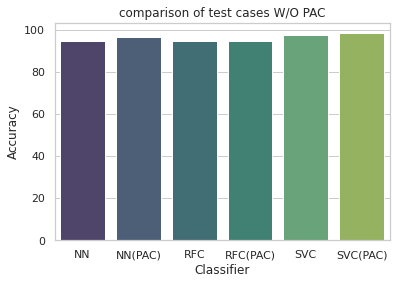

In [ ]:
x_axis = ["NN", "NN(PAC)","RFC","RFC(PAC)","SVC","SVC(PAC)"]
y_axis = [v5*100,v4*100,v2*100,v3*100,v0*100,v1*100]
frame= pd.DataFrame(
    {'Classifier':x_axis,
     'Accuracy': y_axis,
    })
sns.set_theme(style="whitegrid")
plt.title("comparison of test cases W/O PAC")
ax = sns.barplot(x="Classifier", y="Accuracy", data=frame,
                 palette="viridis",saturation=.5)